In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import requests
import json




In [2]:
#running the api to get data of resale flats for 2017 and beyond

payload = "------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"searchVal\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"returnGeom {Y/N}\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"getAddrDetails {Y/N}\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"pageNum\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW--"
headers = {
'content-type': "multipart/form-data; boundary=----WebKitFormBoundary7MA4YWxkTrZu0gW",
'Cache-Control': "no-cache",
'Postman-Token': "5f4af03e-410e-4b28-93bc-05006b4de49a"
 }
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee&limit=100000'
   
response = requests.request("GET", url, data=payload, headers=headers)
x= response.json()

In [3]:
#converting the json response into a df
flats= pd.DataFrame()
for entry in range(len(x)):
    temp_df = pd.DataFrame.from_dict(x['result']['records'])
    flats=flats.append(temp_df)

In [4]:
flats

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block
0,ANG MO KIO,2 ROOM,Improved,44,ANG MO KIO AVE 10,232000,2017-01,61 years 04 months,1979,10 TO 12,1,406
1,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 4,250000,2017-01,60 years 07 months,1978,01 TO 03,2,108
2,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 5,262000,2017-01,62 years 05 months,1980,01 TO 03,3,602
3,ANG MO KIO,3 ROOM,New Generation,68,ANG MO KIO AVE 10,265000,2017-01,62 years 01 month,1980,04 TO 06,4,465
4,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 5,265000,2017-01,62 years 05 months,1980,01 TO 03,5,601
...,...,...,...,...,...,...,...,...,...,...,...,...
64583,YISHUN,EXECUTIVE,Apartment,142,YISHUN RING RD,580000,2019-12,67 years 07 months,1988,04 TO 06,64584,326
64584,YISHUN,EXECUTIVE,Maisonette,146,YISHUN RING RD,565000,2019-12,67 years 07 months,1988,07 TO 09,64585,326
64585,YISHUN,EXECUTIVE,Apartment,164,YISHUN ST 61,633000,2019-12,71 years 06 months,1992,01 TO 03,64586,608
64586,YISHUN,EXECUTIVE,Apartment,164,YISHUN ST 61,788888,2019-12,71 years 06 months,1992,10 TO 12,64587,604


In [5]:
#running the api to get data of resale flats for 2015 to 2016

payload = "------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"searchVal\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"returnGeom {Y/N}\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"getAddrDetails {Y/N}\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"pageNum\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW--"
headers = {
'content-type': "multipart/form-data; boundary=----WebKitFormBoundary7MA4YWxkTrZu0gW",
'Cache-Control': "no-cache",
'Postman-Token': "5f4af03e-410e-4b28-93bc-05006b4de49a"
 }
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=1b702208-44bf-4829-b620-4615ee19b57c&limit=100000'
   
response = requests.request("GET", url, data=payload, headers=headers)
x= response.json()

In [6]:
#adding the data for 2015 and 2016 into the existing df
for entry in range(len(x)):
    temp_df = pd.DataFrame.from_dict(x['result']['records'])
    flats=flats.append(temp_df)

In [7]:
flats.shape

(305223, 12)

In [8]:
flats.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block
0,ANG MO KIO,2 ROOM,Improved,44,ANG MO KIO AVE 10,232000,2017-01,61 years 04 months,1979,10 TO 12,1,406
1,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 4,250000,2017-01,60 years 07 months,1978,01 TO 03,2,108
2,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 5,262000,2017-01,62 years 05 months,1980,01 TO 03,3,602
3,ANG MO KIO,3 ROOM,New Generation,68,ANG MO KIO AVE 10,265000,2017-01,62 years 01 month,1980,04 TO 06,4,465
4,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 5,265000,2017-01,62 years 05 months,1980,01 TO 03,5,601


In [9]:
flats.isnull().sum() #check for missing values

town                   0
flat_type              0
flat_model             0
floor_area_sqm         0
street_name            0
resale_price           0
month                  0
remaining_lease        0
lease_commence_date    0
storey_range           0
_id                    0
block                  0
dtype: int64

In [10]:
flats = flats.drop(['_id'],axis =1)

In [11]:
flats['year']= pd.DatetimeIndex(flats['month']).year

In [12]:
flats.dtypes

town                   object
flat_type              object
flat_model             object
floor_area_sqm         object
street_name            object
resale_price           object
month                  object
remaining_lease        object
lease_commence_date    object
storey_range           object
block                  object
year                    int64
dtype: object

In [13]:
#limiting data from 2016 to 2019 

flats = flats[flats['year']>2015]

In [14]:
flats['floor_area_sqm']=flats['floor_area_sqm'].astype('float')
flats['resale_price'] = flats['resale_price'].astype('float')

flats['lease_commence_date']= flats['lease_commence_date'].astype('int')
flats['year']= flats['year'].astype('int')

In [15]:
flats['remaining_lease']= 99- (flats['year']-flats['lease_commence_date'])

In [16]:
flats.dtypes

town                    object
flat_type               object
flat_model              object
floor_area_sqm         float64
street_name             object
resale_price           float64
month                   object
remaining_lease          int32
lease_commence_date      int32
storey_range            object
block                   object
year                     int32
dtype: object

In [17]:
flats.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,block,year
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,61,1979,10 TO 12,406,2017
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,60,1978,01 TO 03,108,2017
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,62,1980,01 TO 03,602,2017
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,62,1980,04 TO 06,465,2017
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,62,1980,01 TO 03,601,2017


In [18]:
# psf stands for per square foot which is the price per square foot of house area. This helps to mitigate the impact of size differentials. 
flats['psf'] = flats['resale_price'] % flats['floor_area_sqm']

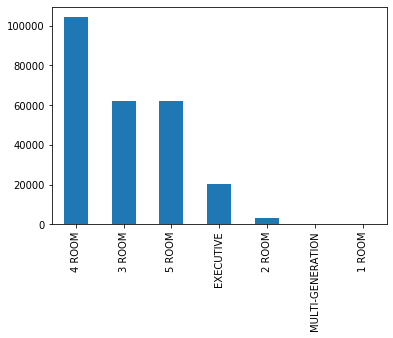

In [19]:
#4room flats are most commonly sold
flats['flat_type'].value_counts().plot(kind='bar')

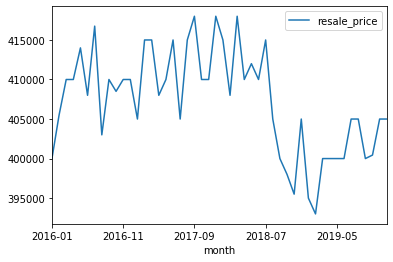

In [20]:
#there was a hige drop in prices around mid 2018
flats_Year = flats.groupby(['month'],as_index=True).median()[['resale_price']]
flats_Year.plot(kind='line')

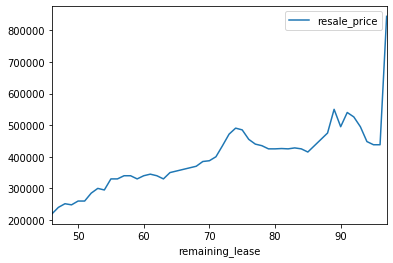

In [21]:
#housing prices decrease steadily with decreasing leases.

flats_rem_lease = flats.groupby(['remaining_lease'],as_index=True).median()[['resale_price']]
flats_rem_lease.plot(kind='line')

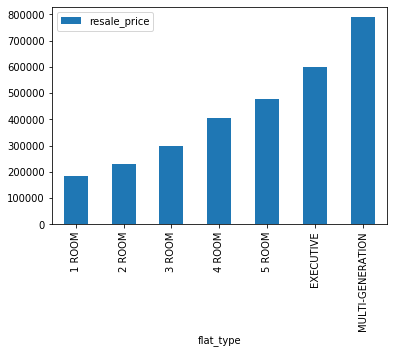

In [22]:
#larger flats sell for a higher price. this is intuitive
flats_type = flats.groupby(['flat_type'],as_index=True).median()[['resale_price']]
flats_type.plot(kind='bar')

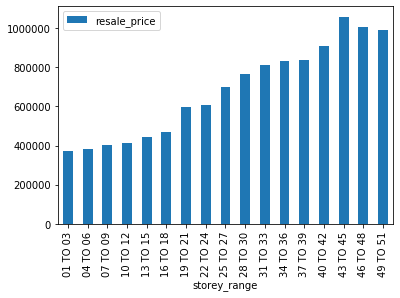

In [23]:
#flats on higher floors sell for a higher price.
flats_type = flats.groupby(['storey_range'],as_index=True).median()[['resale_price']]
flats_type.plot(kind='bar')

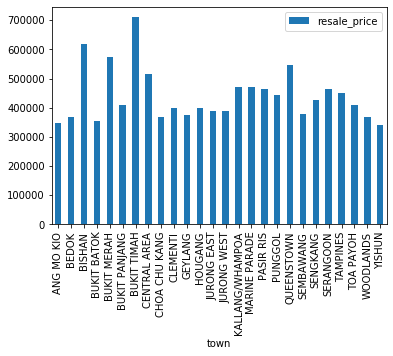

In [24]:
#areas closer to the city sell for higher prices
flats_type = flats.groupby(['town'],as_index=True).median()[['resale_price']]
flats_type.plot(kind='bar')

In [25]:
four_rm = flats[flats['flat_type']== '4 ROOM' ]

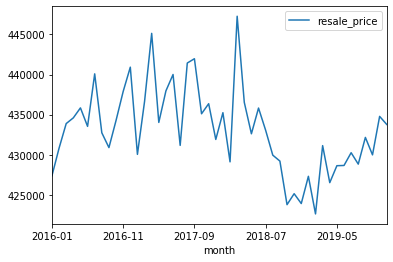

In [26]:
#four room flats were also affected by the same price drop in mid 2018
four_rm_Year = four_rm.groupby(['month'],as_index=True).mean()[['resale_price']]
four_rm_Year.plot(kind='line')

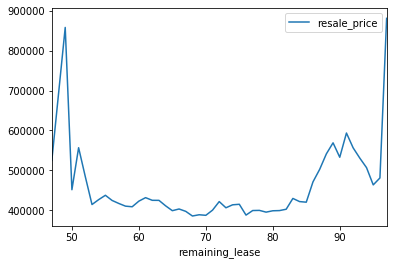

In [27]:
four_rm_rem_lease = four_rm.groupby(['remaining_lease'],as_index=True).mean()[['resale_price']]
four_rm_rem_lease.plot(kind='line')

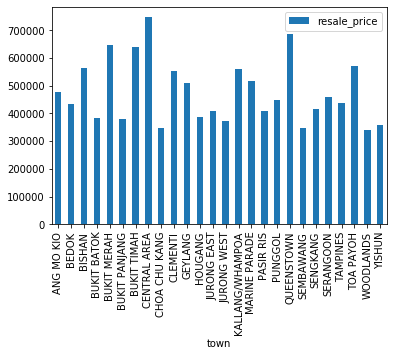

In [28]:
four_rm_town = four_rm.groupby(['town'],as_index=True).mean()[['resale_price']]
four_rm_town.plot(kind='bar')

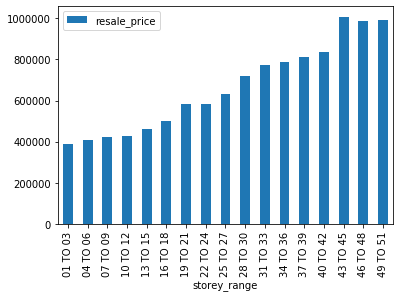

In [29]:
four_rm_storey = four_rm.groupby(['storey_range'],as_index=True).mean()[['resale_price']]
four_rm_storey.plot(kind='bar')

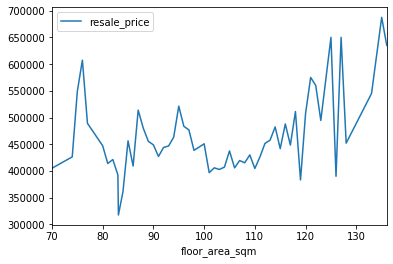

In [30]:
four_rm_storey = four_rm.groupby(['floor_area_sqm'],as_index=True).mean()[['resale_price']]
four_rm_storey.plot(kind='line')

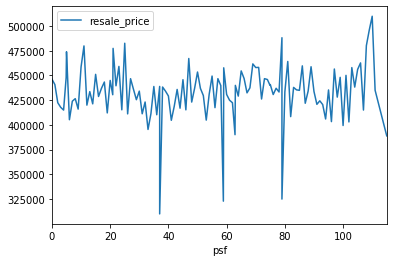

In [31]:
four_rm_px = four_rm.groupby(['psf'],as_index=True).mean()[['resale_price']]
four_rm_px.plot(kind='line')

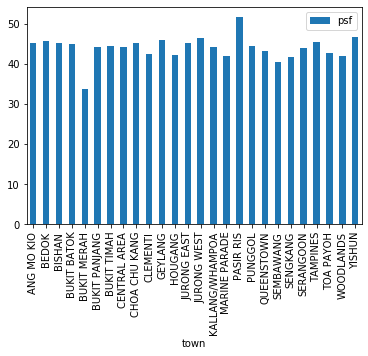

In [32]:
four_rm_town = four_rm.groupby(['town'],as_index=True).mean()[['psf']]
four_rm_town.plot(kind='bar')

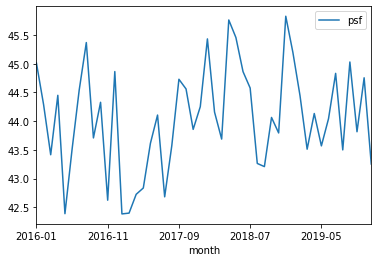

In [33]:
four_rm_Year = four_rm.groupby(['month'],as_index=True).mean()[['psf']]
four_rm_Year.plot(kind='line')

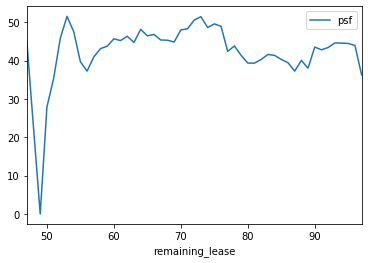

In [34]:
#clear drop in psf and an especially sharp drop around the 50 year remaining lease mark

four_rm_rem_lease = four_rm.groupby(['remaining_lease'],as_index=True).mean()[['psf']]
four_rm_rem_lease.plot(kind='line')

In [35]:
#creating a full street name to be able to obtain geolocation information from
new = four_rm['street_name'].copy()
four_rm['full_address'] = four_rm['block'].str.cat(new, sep=" ")
                                 

C:\Users\Natasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
four_rm['full_address'] #checking that the address is coming in correctly

33       472 ANG MO KIO AVE 10
34       475 ANG MO KIO AVE 10
35        629 ANG MO KIO AVE 4
36       546 ANG MO KIO AVE 10
37        131 ANG MO KIO AVE 3
                 ...          
37136         727 YISHUN ST 71
37137         738 YISHUN ST 72
37138         738 YISHUN ST 72
37139         844 YISHUN ST 81
37140         868 YISHUN ST 81
Name: full_address, Length: 104367, dtype: object

In [37]:
home_address = four_rm['full_address'].unique().tolist()

In [38]:
test = home_address[1:10]
test

['475 ANG MO KIO AVE 10',
 '629 ANG MO KIO AVE 4',
 '546 ANG MO KIO AVE 10',
 '131 ANG MO KIO AVE 3',
 '254 ANG MO KIO AVE 4',
 '470 ANG MO KIO AVE 10',
 '601 ANG MO KIO AVE 5',
 '463 ANG MO KIO AVE 10',
 '207 ANG MO KIO AVE 1']

In [41]:
#running an api to be able to pull the longitude and latitude information from onemap

import requests

query_results = []
querystring = {}

for x in home_address:
    url = "https://developers.onemap.sg/commonapi/search"
    

    querystring.update({"searchVal":x,"returnGeom":"Y","getAddrDetails":"Y","pageNum":"1"})
    #print (querystring['searchVal'])
    
    payload = "------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"searchVal\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"returnGeom {Y/N}\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"getAddrDetails {Y/N}\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"pageNum\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW--"
    headers = {
    'content-type': "multipart/form-data; boundary=----WebKitFormBoundary7MA4YWxkTrZu0gW",
    'Cache-Control': "no-cache",
    'Postman-Token': "5f4af03e-410e-4b28-93bc-05006b4de49a"
    }

    response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
    

    query_results.append(response.json())

#print(response.text)
print('Search Done.')

Search Done.


In [42]:
type(query_results)

list

In [43]:
len(query_results)

5990

In [44]:
query_results[1]['results']

[{'SEARCHVAL': 'TECK GHEE HORIZON',
  'BLK_NO': '475',
  'ROAD_NAME': 'ANG MO KIO AVENUE 10',
  'BUILDING': 'TECK GHEE HORIZON',
  'ADDRESS': '475 ANG MO KIO AVENUE 10 TECK GHEE HORIZON SINGAPORE 560475',
  'POSTAL': '560475',
  'X': '30581.59123',
  'Y': '38301.87695',
  'LATITUDE': '1.3626629780000001',
  'LONGITUDE': '103.8565159',
  'LONGTITUDE': '103.8565159'}]

In [45]:
#creating a df with longitude and latitude information for all 4-room sold addresses
geo_df = pd.DataFrame()
for entry in range(len(query_results)):
    df = pd.DataFrame.from_dict(query_results[entry]['results'])
    geo_df = geo_df.append(df)

In [46]:
geo_df.head()

,SEARCHVAL,BLK_NO,ROAD_NAME,BUILDING,ADDRESS,POSTAL,X,Y,LATITUDE,LONGITUDE,LONGTITUDE
0,TECK GHEE HORIZON,472,ANG MO KIO AVENUE 10,TECK GHEE HORIZON,472 ANG MO KIO AVENUE 10 TECK GHEE HORIZON SIN...,560472,30759.94902,38355.05955,1.3631439269999999,103.8581186,103.8581186
0,TECK GHEE HORIZON,475,ANG MO KIO AVENUE 10,TECK GHEE HORIZON,475 ANG MO KIO AVENUE 10 TECK GHEE HORIZON SIN...,560475,30581.59123,38301.87695,1.3626629780000001,103.8565159,103.8565159
0,YIO CHU KANG VIEW,629,ANG MO KIO AVENUE 4,YIO CHU KANG VIEW,629 ANG MO KIO AVENUE 4 YIO CHU KANG VIEW SING...,560629,28789.036030000003,40230.48807,1.38010475,103.84040870000001,103.84040870000001
1,DBS ANG MO KIO NORTH BRANCH,629,ANG MO KIO AVENUE 4,DBS ANG MO KIO NORTH BRANCH,629 ANG MO KIO AVENUE 4 DBS ANG MO KIO NORTH B...,560629,28789.03909,40230.47711,1.380104651,103.84040870000001,103.84040870000001
2,OCBC ANG MO KIO BRANCH,629,ANG MO KIO AVENUE 4,OCBC ANG MO KIO BRANCH,629 ANG MO KIO AVENUE 4 OCBC ANG MO KIO BRANCH...,560629,28789.03909,40230.47711,1.380104651,103.84040870000001,103.84040870000001


In [47]:
geo_df["full_address"] = geo_df["BLK_NO"].map(str) + ' ' + geo_df["ROAD_NAME"].map(str)

In [48]:
# Do the same for the dataset which contains HDB resale addresses
geo_df['lat_long'] = geo_df['LATITUDE'] +' '+ geo_df['LONGITUDE']
geo_df['lat_long'] = geo_df['lat_long'].apply(lambda x: tuple(x.split(' ')))

In [50]:
 #train station information is in the shapefile and need to be converted to obtain the coords. 
def read_shapefile(shp_path):
        
    import shapefile

    myshp = open(shp_path, "rb")
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [51]:
#change the path where the shape file resides  on your pc 
mrt_geo_df = read_shapefile('C:/Users/Natasha/Desktop/TrainStation_Oct2017/MRTLRTStnPtt.shp') 

In [52]:
station_address_list = mrt_geo_df['STN_NAME'].unique().tolist()
len(station_address_list)

164

In [53]:
#obtain coords of train stations

import requests

station_search_results = []
querystring = {}

for x in station_address_list:
    url = "https://developers.onemap.sg/commonapi/search"
    

    querystring.update({"searchVal":x,"returnGeom":"Y","getAddrDetails":"Y","pageNum":"1"})
    #print (querystring['searchVal'])
    
    payload = "------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"searchVal\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"returnGeom {Y/N}\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"getAddrDetails {Y/N}\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"pageNum\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW--"
    headers = {
    'content-type': "multipart/form-data; boundary=----WebKitFormBoundary7MA4YWxkTrZu0gW",
    'Cache-Control': "no-cache",
    'Postman-Token': "5f4af03e-410e-4b28-93bc-05006b4de49a"
    }

    response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
    

    station_search_results.append(response.json())

#print(response.text)
print('Search Done.')

Search Done.


In [54]:
station_latlong_df = pd.DataFrame()
for entry in range(len(station_search_results)):
    temp_df = pd.DataFrame.from_dict(station_search_results[entry]['results'])
    station_latlong_df = station_latlong_df.append(temp_df)

In [55]:
station_latlong_df.head()

,SEARCHVAL,BLK_NO,ROAD_NAME,BUILDING,ADDRESS,POSTAL,X,Y,LATITUDE,LONGITUDE,LONGTITUDE
0,EUNOS MRT STATION EXIT A,,NIL,EUNOS MRT STATION EXIT A,EUNOS MRT STATION EXIT A,NIL,35743.0776,33531.14163,1.319517275,103.9028941,103.9028941
1,EUNOS MRT STATION EXIT B,,NIL,EUNOS MRT STATION EXIT B,EUNOS MRT STATION EXIT B,NIL,35708.34817,33536.14644,1.319562546,103.9025821,103.9025821
2,EUNOS MRT STATION EXIT C,,NIL,EUNOS MRT STATION EXIT C,EUNOS MRT STATION EXIT C,NIL,35774.73652,33541.2482,1.319608667,103.90317859999999,103.90317859999999
3,EUNOS MRT STATION (EW7),30,EUNOS CRESCENT,EUNOS MRT STATION (EW7),30 EUNOS CRESCENT EUNOS MRT STATION SINGAPORE ...,409423,35779.98898,33560.58575,1.319783548,103.90322579999999,103.90322579999999
4,DBS EUNOS MRT STATION,30,EUNOS CRESCENT,DBS EUNOS MRT STATION,30 EUNOS CRESCENT DBS EUNOS MRT STATION SINGAP...,409423,35766.0164,33554.35,1.319727157,103.9031003,103.9031003


In [56]:

# Concatenate latitude and longitude columns into one column
station_latlong_df['lat_long'] = station_latlong_df['LATITUDE'] +' '+ station_latlong_df['LONGITUDE']

# convert lat_long column to tuples
station_latlong_df['lat_long'] = station_latlong_df['lat_long'].apply(lambda x: tuple(x.split(' ')))


In [57]:
station_latlong_df.reset_index()

,index,SEARCHVAL,BLK_NO,ROAD_NAME,BUILDING,ADDRESS,POSTAL,X,Y,LATITUDE,LONGITUDE,LONGTITUDE,lat_long
0,0,EUNOS MRT STATION EXIT A,,NIL,EUNOS MRT STATION EXIT A,EUNOS MRT STATION EXIT A,NIL,35743.0776,33531.14163,1.319517275,103.9028941,103.9028941,"(1.319517275, 103.9028941)"
1,1,EUNOS MRT STATION EXIT B,,NIL,EUNOS MRT STATION EXIT B,EUNOS MRT STATION EXIT B,NIL,35708.34817,33536.14644,1.319562546,103.9025821,103.9025821,"(1.319562546, 103.9025821)"
2,2,EUNOS MRT STATION EXIT C,,NIL,EUNOS MRT STATION EXIT C,EUNOS MRT STATION EXIT C,NIL,35774.73652,33541.2482,1.319608667,103.90317859999999,103.90317859999999,"(1.319608667, 103.90317859999999)"
3,3,EUNOS MRT STATION (EW7),30,EUNOS CRESCENT,EUNOS MRT STATION (EW7),30 EUNOS CRESCENT EUNOS MRT STATION SINGAPORE ...,409423,35779.98898,33560.58575,1.319783548,103.90322579999999,103.90322579999999,"(1.319783548, 103.90322579999999)"
4,4,DBS EUNOS MRT STATION,30,EUNOS CRESCENT,DBS EUNOS MRT STATION,30 EUNOS CRESCENT DBS EUNOS MRT STATION SINGAP...,409423,35766.0164,33554.35,1.319727157,103.9031003,103.9031003,"(1.319727157, 103.9031003)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,TELOK BLANGAH MRT STATION (CC28),463,TELOK BLANGAH ROAD,TELOK BLANGAH MRT STATION (CC28),463 TELOK BLANGAH ROAD TELOK BLANGAH MRT STATI...,109028,25378.2908,28133.79905,1.270706477,103.80976159999999,103.80976159999999,"(1.270706477, 103.80976159999999)"
565,0,TELOK AYER MRT STATION EXIT C,,NIL,TELOK AYER MRT STATION EXIT C,TELOK AYER MRT STATION EXIT C,NIL,29728.088180000002,29413.06043,1.28227573,103.84884609999999,103.84884609999999,"(1.28227573, 103.84884609999999)"
566,1,TELOK AYER MRT STATION EXIT B,,NIL,TELOK AYER MRT STATION EXIT B,TELOK AYER MRT STATION EXIT B,NIL,29719.28592,29437.864410000002,1.282500049,103.84876700000001,103.84876700000001,"(1.282500049, 103.84876700000001)"
567,2,TELOK AYER MRT STATION EXIT A,,NIL,TELOK AYER MRT STATION EXIT A,TELOK AYER MRT STATION EXIT A,NIL,29691.000760000003,29370.527469999997,1.281891079,103.8485129,103.8485129,"(1.281891079, 103.8485129)"


In [58]:
# convert the lat_long column in station_latlong_df to a list
station_latlong_list = list(station_latlong_df.T.iloc[-1,:])

In [59]:
station_latlong_list 

[('1.319517275', '103.9028941'),
 ('1.319562546', '103.9025821'),
 ('1.319608667', '103.90317859999999'),
 ('1.319783548', '103.90322579999999'),
 ('1.319727157', '103.9031003'),
 ('1.319727157', '103.9031003'),
 ('1.319727157', '103.9031003'),
 ('1.342440843', '103.7322246'),
 ('1.342101479', '103.7326688'),
 ('1.342234277', '103.73241479999999'),
 ('1.342352821', '103.7325967'),
 ('1.342244948', '103.73276659999999'),
 ('1.342244948', '103.73276659999999'),
 ('1.342244948', '103.73276659999999'),
 ('1.4171305459999999', '103.83269179999999'),
 ('1.4170363730000002', '103.8329527'),
 ('1.41789179', '103.8331718'),
 ('1.417887193', '103.83254050000001'),
 ('1.41738337', '103.83297990000001'),
 ('1.41738337', '103.83297990000001'),
 ('1.417589061', '103.833061'),
 ('1.417589061', '103.833061'),
 ('1.4248605980000002', '103.7619343'),
 ('1.4251259490000001', '103.7617547'),
 ('1.42513173', '103.7624922'),
 ('1.424739805', '103.7620183'),
 ('1.425086981', '103.7621375'),
 ('1.425069063', 

In [60]:
#obtain the distance between the sold flat and the mrt stations
import geopy
import geopy.distance

station_distance_df = pd.DataFrame(geo_df["lat_long"])
for x in station_latlong_list:
    station_distance_df[x]=geo_df['lat_long'].apply(lambda y: geopy.distance.distance(y, x).km)

In [61]:
#use min to get the closest mrt 
station_distance_df['distance_to_nearest_station'] = station_distance_df.iloc[:,1:].apply(lambda x: min(x), axis=1)

In [62]:
station_distance_df = station_distance_df.iloc[:,[0,-1]]

In [63]:
station_distance_df.head(1)

,lat_long,distance_to_nearest_station
0,"(1.3631439269999999, 103.8581186)",1.188474


In [64]:
house_mrt = pd.merge(geo_df, station_distance_df, on='lat_long', how='left')

In [65]:
house_mrt = house_mrt.drop_duplicates('full_address')

In [66]:
house_mrt

,SEARCHVAL,BLK_NO,ROAD_NAME,BUILDING,ADDRESS,POSTAL,X,Y,LATITUDE,LONGITUDE,LONGTITUDE,full_address,lat_long,distance_to_nearest_station
0,TECK GHEE HORIZON,472,ANG MO KIO AVENUE 10,TECK GHEE HORIZON,472 ANG MO KIO AVENUE 10 TECK GHEE HORIZON SIN...,560472,30759.94902,38355.05955,1.3631439269999999,103.8581186,103.8581186,472 ANG MO KIO AVENUE 10,"(1.3631439269999999, 103.8581186)",1.188474
1,TECK GHEE HORIZON,475,ANG MO KIO AVENUE 10,TECK GHEE HORIZON,475 ANG MO KIO AVENUE 10 TECK GHEE HORIZON SIN...,560475,30581.59123,38301.87695,1.3626629780000001,103.8565159,103.8565159,475 ANG MO KIO AVENUE 10,"(1.3626629780000001, 103.8565159)",1.084940
2,YIO CHU KANG VIEW,629,ANG MO KIO AVENUE 4,YIO CHU KANG VIEW,629 ANG MO KIO AVENUE 4 YIO CHU KANG VIEW SING...,560629,28789.036030000003,40230.48807,1.38010475,103.84040870000001,103.84040870000001,629 ANG MO KIO AVENUE 4,"(1.38010475, 103.84040870000001)",0.514819
12,CHENG SAN GREEN,546,ANG MO KIO AVENUE 10,CHENG SAN GREEN,546 ANG MO KIO AVENUE 10 CHENG SAN GREEN SINGA...,560546,30637.924160000002,39516.90349,1.373651239,103.8570222,103.8570222,546 ANG MO KIO AVENUE 10,"(1.373651239, 103.8570222)",0.962899
13,YIO CHU KANG VILLE,131,ANG MO KIO AVENUE 3,YIO CHU KANG VILLE,131 ANG MO KIO AVENUE 3 YIO CHU KANG VILLE SIN...,560131,28943.915039999996,39225.43046,1.371015364,103.8418003,103.8418003,131 ANG MO KIO AVENUE 3,"(1.371015364, 103.8418003)",0.869779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,HDB-PASIR RIS,745,PASIR RIS STREET 71,HDB-PASIR RIS,745 PASIR RIS STREET 71 HDB-PASIR RIS SINGAPOR...,510745,39381.33667,40038.77438,1.378368761,103.9355882,103.9355882,745 PASIR RIS STREET 71,"(1.378368761, 103.9355882)",1.625110
8457,COMPASSVALE PLAINS,229,COMPASSVALE WALK,COMPASSVALE PLAINS,229 COMPASSVALE WALK COMPASSVALE PLAINS SINGAP...,540229,35504.655060000005,41177.064139999995,1.3886642880000002,103.9007537,103.9007537,229 COMPASSVALE WALK,"(1.3886642880000002, 103.9007537)",0.523917
8459,COMPASSVALE SOUTH GATE,200B,SENGKANG EAST ROAD,COMPASSVALE SOUTH GATE,200B SENGKANG EAST ROAD COMPASSVALE SOUTH GATE...,542200,34612.343389999995,41000.24076,1.3870653780000002,103.8927356,103.8927356,200B SENGKANG EAST ROAD,"(1.3870653780000002, 103.8927356)",0.247308
8460,HDB-TAMPINES,207,TAMPINES STREET 21,HDB-TAMPINES,207 TAMPINES STREET 21 HDB-TAMPINES SINGAPORE ...,520207,41233.0903,37052.6625,1.3513627119999998,103.9522262,103.9522262,207 TAMPINES STREET 21,"(1.3513627119999998, 103.9522262)",0.573466


In [67]:
df_raffles_mrt = [{'x': 30021.21296, 'y': 29670.828269999998, 'latitude': 1.284606874, 'longitude': 103.85148000000001, 'lat_long':(1.284606874,103.85148000000001) }]
df_raffles_mrt =  pd.DataFrame(df_raffles_mrt, columns =['x', 'y', 'latitude', 'longitude', 'lat_long'])
raffles_mrt_list = list(df_raffles_mrt.T.iloc[-1,:])

In [68]:
df_raffles_mrt.head()

,x,y,latitude,longitude,lat_long
0,30021.21296,29670.82827,1.284607,103.85148,"(1.284606874, 103.85148000000001)"


In [69]:
#get the distance to raffles mrt which is the proxy used for city
raffles_station_distance_df = pd.DataFrame(geo_df["lat_long"])
for x in raffles_mrt_list:
    raffles_station_distance_df[x]=geo_df['lat_long'].apply(lambda y: geopy.distance.distance(y, x).km)

In [70]:
raffles_station_distance_df['distance_to_city'] = raffles_station_distance_df.iloc[:,1:].apply(lambda x: min(x), axis=1)

In [71]:
raffles_station_distance_df = raffles_station_distance_df.iloc[:,[0,-1]]

In [72]:
raffles_station_distance_df

,lat_long,distance_to_city
0,"(1.3631439269999999, 103.8581186)",8.715595
0,"(1.3626629780000001, 103.8565159)",8.649220
0,"(1.38010475, 103.84040870000001)",10.631306
1,"(1.380104651, 103.84040870000001)",10.631295
2,"(1.380104651, 103.84040870000001)",10.631295
...,...,...
0,"(1.3886642880000002, 103.9007537)",12.746038
1,"(1.3886642809999998, 103.9007537)",12.746037
0,"(1.3870653780000002, 103.8927356)",12.224321
0,"(1.3513627119999998, 103.9522262)",13.423758


In [73]:
house_mrt_city = pd.merge(house_mrt, raffles_station_distance_df, on='lat_long', how='left')

In [74]:
house_mrt_city = house_mrt_city.drop_duplicates('full_address')

In [75]:
#obtain the hdb property information dataset with additional information 

payload = "------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"searchVal\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"returnGeom {Y/N}\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"getAddrDetails {Y/N}\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW\r\nContent-Disposition: form-data; name=\"pageNum\"\r\n\r\n\r\n------WebKitFormBoundary7MA4YWxkTrZu0gW--"
headers = {
'content-type': "multipart/form-data; boundary=----WebKitFormBoundary7MA4YWxkTrZu0gW",
'Cache-Control': "no-cache",
'Postman-Token': "5f4af03e-410e-4b28-93bc-05006b4de49a"
 }
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=482bfa14-2977-4035-9c61-c85f871daf4e&limit=100000'
   
response = requests.request("GET", url, data=payload, headers=headers)
x=response.json()

In [76]:
hdb_amenities= pd.DataFrame()
for entry in range(len(x)):
    temp_df = pd.DataFrame.from_dict(x['result']['records'])
    hdb_amenities=hdb_amenities.append(temp_df)

In [77]:
hdb_amenities.head()

,year_completed,multigen_sold,bldg_contract_town,multistorey_carpark,street,total_dwelling_units,blk_no,exec_sold,max_floor_lvl,residential,...,commercial,4room_sold,miscellaneous,studio_apartment_sold,2room_rental,2room_sold,1room_rental,3room_rental,market_hawker,_id
0,1973,0,CT,N,CHIN SWEE RD,272,52,0,20,Y,...,Y,0,N,0,1,0,271,0,N,1
1,1965,0,GL,N,CIRCUIT RD,120,52,0,10,Y,...,N,0,N,0,78,22,0,1,N,2
2,2011,0,BM,N,HAVELOCK RD,184,52,0,35,Y,...,N,68,N,47,0,1,0,0,N,3
3,1959,0,KWN,N,JLN BAHAGIA,6,52,0,2,Y,...,N,0,N,0,0,0,0,0,N,4
4,1981,0,KWN,N,KENT RD,127,52,0,12,Y,...,N,127,Y,0,0,0,0,0,N,5


In [78]:
hdb_amenities.columns

Index(['year_completed', 'multigen_sold', 'bldg_contract_town',
       'multistorey_carpark', 'street', 'total_dwelling_units', 'blk_no',
       'exec_sold', 'max_floor_lvl', 'residential', '1room_sold',
       'precinct_pavilion', 'other_room_rental', '5room_sold', '3room_sold',
       'commercial', '4room_sold', 'miscellaneous', 'studio_apartment_sold',
       '2room_rental', '2room_sold', '1room_rental', '3room_rental',
       'market_hawker', '_id'],
      dtype='object')

In [81]:
hdb_amenities= hdb_amenities.drop(['_id', 'bldg_contract_town', '1room_sold',
       'other_room_rental', '5room_sold', '3room_sold',
        '4room_sold', 'miscellaneous', 'studio_apartment_sold',
       '2room_rental', '2room_sold', '1room_rental', '3room_rental','max_floor_lvl'], axis=1)

In [82]:
new2= hdb_amenities['street'].copy()
hdb_amenities['full_address'] = hdb_amenities['blk_no'].str.cat(new2, sep=" ")


In [83]:
hdb_amenities.head()

,year_completed,multigen_sold,multistorey_carpark,street,total_dwelling_units,blk_no,exec_sold,residential,precinct_pavilion,commercial,market_hawker,full_address
0,1973,0,N,CHIN SWEE RD,272,52,0,Y,N,Y,N,52 CHIN SWEE RD
1,1965,0,N,CIRCUIT RD,120,52,0,Y,N,N,N,52 CIRCUIT RD
2,2011,0,N,HAVELOCK RD,184,52,0,Y,N,N,N,52 HAVELOCK RD
3,1959,0,N,JLN BAHAGIA,6,52,0,Y,N,N,N,52 JLN BAHAGIA
4,1981,0,N,KENT RD,127,52,0,Y,N,N,N,52 KENT RD


In [84]:
house_mrt_city['full_address'] = house_mrt_city['full_address'].str.replace('AVENUE', 'AVE') \
                                    .str.replace('CRESCENT', 'CRES') \
                                    .str.replace('ROAD', 'RD') \
                                    .str.replace('STREET', 'ST') \
                                    .str.replace('CENTRAL', 'CTRL') \
                                    .str.replace('HEIGHTS', 'HTS') \
                                    .str.replace('TERRACE', 'TER') \
                                    .str.replace('JALAN', 'JLN') \
                                    .str.replace('DRIVE', 'DR') \
                                    .str.replace('PLACE', 'PL') \
                                    .str.replace('CLOSE', 'CL') \
                                    .str.replace('PARK', 'PK') \
                                    .str.replace('GARDENS', 'GDNS') \
                                    .str.replace('NORTH', 'NTH') \
                                    .str.replace('SOUTH', 'STH') \
                                    .str.replace('BUKIT', 'BT') \
                                    .str.replace('UPPER', 'UPP}') \
                                    .str.replace('COMMONWEALTH', "C'WEALTH") \
                                    .str.replace('KAMPONG', "KG") \
                                    .str.replace('LORONG', "LOR") \
                                    .str.replace('TANJONG', "TG") \
                                    .str.replace('INDUSTRIAL', "IND") \
                                    
                                    

In [85]:
hdb_amentities = hdb_amenities[hdb_amenities['residential']== 'Y']

In [86]:
hdb_amentities.head()

,year_completed,multigen_sold,multistorey_carpark,street,total_dwelling_units,blk_no,exec_sold,residential,precinct_pavilion,commercial,market_hawker,full_address
0,1973,0,N,CHIN SWEE RD,272,52,0,Y,N,Y,N,52 CHIN SWEE RD
1,1965,0,N,CIRCUIT RD,120,52,0,Y,N,N,N,52 CIRCUIT RD
2,2011,0,N,HAVELOCK RD,184,52,0,Y,N,N,N,52 HAVELOCK RD
3,1959,0,N,JLN BAHAGIA,6,52,0,Y,N,N,N,52 JLN BAHAGIA
4,1981,0,N,KENT RD,127,52,0,Y,N,N,N,52 KENT RD


In [87]:
df = pd.merge(four_rm, house_mrt_city, on='full_address', how='left')

In [88]:
df.shape

(104367, 28)

In [89]:
df.isnull().sum()

town                             0
flat_type                        0
flat_model                       0
floor_area_sqm                   0
street_name                      0
resale_price                     0
month                            0
remaining_lease                  0
lease_commence_date              0
storey_range                     0
block                            0
year                             0
psf                              0
full_address                     0
SEARCHVAL                      918
BLK_NO                         918
ROAD_NAME                      918
BUILDING                       918
ADDRESS                        918
POSTAL                         918
X                              918
Y                              918
LATITUDE                       918
LONGITUDE                      918
LONGTITUDE                     918
lat_long                       918
distance_to_nearest_station    918
distance_to_city               918
dtype: int64

In [90]:
flat_ready = pd.merge(df, hdb_amenities, on='full_address', how='left')

In [91]:
flat_ready.shape

(417645, 39)

In [92]:
flat_ready.isnull().sum()

town                              0
flat_type                         0
flat_model                        0
floor_area_sqm                    0
street_name                       0
resale_price                      0
month                             0
remaining_lease                   0
lease_commence_date               0
storey_range                      0
block                             0
year                              0
psf                               0
full_address                      0
SEARCHVAL                      3303
BLK_NO                         3303
ROAD_NAME                      3303
BUILDING                       3303
ADDRESS                        3303
POSTAL                         3303
X                              3303
Y                              3303
LATITUDE                       3303
LONGITUDE                      3303
LONGTITUDE                     3303
lat_long                       3303
distance_to_nearest_station    3303
distance_to_city            

In [93]:
flat_ready['full_address'].head(500)

0        472 ANG MO KIO AVE 10
1        472 ANG MO KIO AVE 10
2        472 ANG MO KIO AVE 10
3        475 ANG MO KIO AVE 10
4        475 ANG MO KIO AVE 10
                ...           
495    771 CHOA CHU KANG ST 54
496    771 CHOA CHU KANG ST 54
497    771 CHOA CHU KANG ST 54
498     229 CHOA CHU KANG CTRL
499     229 CHOA CHU KANG CTRL
Name: full_address, Length: 500, dtype: object

In [94]:
flat_ready.shape

(417645, 39)

In [95]:
flat_ready = flat_ready.dropna()

In [96]:
flat_ready.isnull().sum()

town                           0
flat_type                      0
flat_model                     0
floor_area_sqm                 0
street_name                    0
resale_price                   0
month                          0
remaining_lease                0
lease_commence_date            0
storey_range                   0
block                          0
year                           0
psf                            0
full_address                   0
SEARCHVAL                      0
BLK_NO                         0
ROAD_NAME                      0
BUILDING                       0
ADDRESS                        0
POSTAL                         0
X                              0
Y                              0
LATITUDE                       0
LONGITUDE                      0
LONGTITUDE                     0
lat_long                       0
distance_to_nearest_station    0
distance_to_city               0
year_completed                 0
multigen_sold                  0
multistore

In [97]:
flat_ready = flat_ready.drop(['block', 'street_name','flat_type', 'full_address', 'SEARCHVAL', 'BLK_NO', 'ROAD_NAME', 'BUILDING', 'ADDRESS', 'POSTAL', 'X',  'Y', 'LATITUDE', 'LONGITUDE', 'LONGTITUDE', 'lat_long', 'blk_no',  'street', 'year_completed'],axis=1)



In [98]:
flat_ready.isna().sum()

town                           0
flat_model                     0
floor_area_sqm                 0
resale_price                   0
month                          0
remaining_lease                0
lease_commence_date            0
storey_range                   0
year                           0
psf                            0
distance_to_nearest_station    0
distance_to_city               0
multigen_sold                  0
multistorey_carpark            0
total_dwelling_units           0
exec_sold                      0
residential                    0
precinct_pavilion              0
commercial                     0
market_hawker                  0
dtype: int64

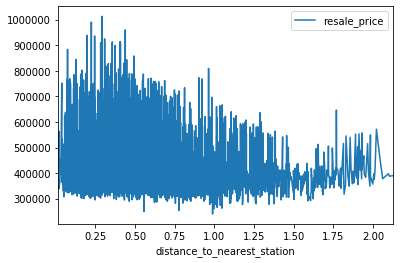

In [99]:
flat_ready_distance_mrt = flat_ready.groupby(['distance_to_nearest_station'],as_index=True).mean()[['resale_price']]
flat_ready_distance_mrt.plot(kind='line')

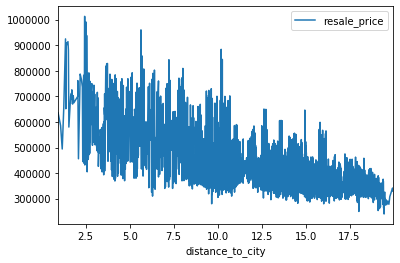

In [100]:
flat_ready_distance_city = flat_ready.groupby(['distance_to_city'],as_index=True).mean()[['resale_price']]
flat_ready_distance_city.plot(kind='line')

In [101]:
#preparing the data to be able to create dummies and convert to specific data types 
to_convert= ['year','storey_range','flat_model','residential','market_hawker','town','commercial','multistorey_carpark']

target=['resale_price']
num_cols= ['distance_to_nearest_station','distance_to_city','psf', 'remaining_lease', 'floor_area_sqm']
           
cols = to_convert + num_cols + target
cat_cols = to_convert

flat_ready[cat_cols]= flat_ready[cat_cols].astype('category')
flat_ready[num_cols]= flat_ready[num_cols].astype(float)
flat_ready_model = flat_ready[cols].copy


#'1room_sold','3room_sold','5room_sold','2room_sold','4room_sold','exec_sold','studio_apartment_sold','multigen_sold','1room_rental','2room_rental','3room_rental','other_room_rental'

In [102]:
dummies=pd.get_dummies(flat_ready[to_convert], drop_first=True, dtype=float)
flat_model = pd.concat([flat_ready[target],flat_ready[num_cols],dummies], axis=1)

In [103]:
flat_model.head()

,resale_price,distance_to_nearest_station,distance_to_city,psf,remaining_lease,floor_area_sqm,year_2017,year_2018,year_2019,storey_range_04 TO 06,...,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,commercial_Y,multistorey_carpark_Y
0,400000.0,1.188474,8.715595,76.0,61.0,92.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,400000.0,1.188474,8.715595,76.0,61.0,92.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,400000.0,1.188474,8.715595,76.0,61.0,92.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,400000.0,1.084940,8.649220,55.0,61.0,91.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,400000.0,1.084940,8.649220,55.0,61.0,91.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
flat_model = flat_model.drop_duplicates()

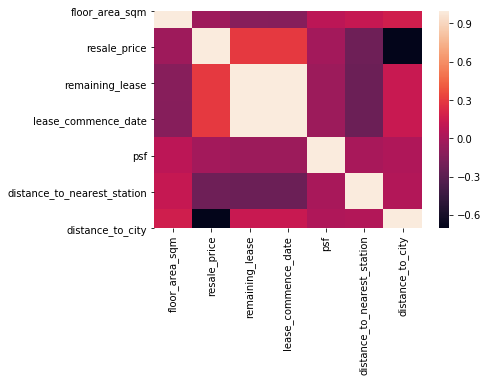

In [105]:
import seaborn as sns
corrMatrix = flat_ready.corr()
sns.heatmap(corrMatrix, annot=False)

In [106]:
flat_modelresale = flat_model.drop(['psf'], axis=1)

In [107]:
yr= flat_modelresale['resale_price'].values.reshape(-1,1)
xr = flat_modelresale.drop(['resale_price'], axis=1)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xr, yr, test_size=0.2, random_state=0)

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27135, 60)
(6784, 60)
(27135, 1)
(6784, 1)


In [110]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)



In [111]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 30897.6698365197
Mean Squared Error: 1633524354.6210926
Root Mean Squared Error: 40416.88204972141


In [112]:
import statsmodels.api as sm
X = sm.add_constant(xr) # adding a constant
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)

C:\Users\Natasha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          5.405e+04
Date:                Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                        09:37:29   Log-Likelihood:                     -3.2659e+05
No. Observations:               27135   AIC:                                  6.533e+05
Df Residuals:                   27075   BIC:                                  6.538e+05
Df Model:                          60                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [113]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [115]:
data_dmatrix = xgb.DMatrix(data=xr,label=yr)

In [116]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [117]:
xg_reg.fit(X_train,y_train)

[09:42:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [118]:
preds = xg_reg.predict(X_test)
preds

array([263536.8 , 273549.06, 254300.55, ..., 286555.06, 277855.28,
       293712.6 ], dtype=float32)

In [119]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 174635.341590


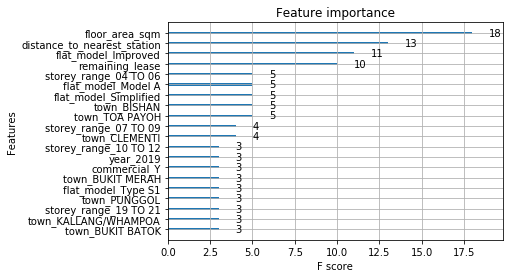

In [120]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg, max_num_features =20)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [121]:
flat_modelpsf = flat_model.drop(['resale_price'], axis=1)  # to evaluate psf we will need to remove resale price

In [122]:
#regression with y as psf


yp= flat_modelpsf['psf'].values.reshape(-1,1)
xp = flat_modelpsf.drop(['psf'], axis=1)
from sklearn.model_selection import train_test_split
Xp_train, Xp_test, yp_train, yp_test = train_test_split(xp, yp, test_size=0.2, random_state=0)
print(Xp_train.shape)
print(Xp_test.shape)
print(yp_train.shape)
print(yp_test.shape)
import numpy as np
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(Xp_train, yp_train)
yp_pred= lr.predict(Xp_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yp_test, yp_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yp_test, yp_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp_test, yp_pred)))

import statsmodels.api as sm
X = sm.add_constant(xp) # adding a constant
model = sm.OLS(yp_train, Xp_train).fit()
predictions = model.predict(Xp_test) 

print_model = model.summary()
print(print_model)

(27135, 60)
(6784, 60)
(27135, 1)
(6784, 1)
Mean Absolute Error: 24.51893005852392
Mean Squared Error: 808.9534474610612
Root Mean Squared Error: 28.442106944828492


C:\Users\Natasha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                              1106.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                        09:44:37   Log-Likelihood:                     -1.2923e+05
No. Observations:               27135   AIC:                                  2.586e+05
Df Residuals:                   27075   BIC:                                  2.591e+05
Df Model:                          60                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

(27135, 60)
(6784, 60)
(27135, 1)
(6784, 1)
[09:53:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 31.453310


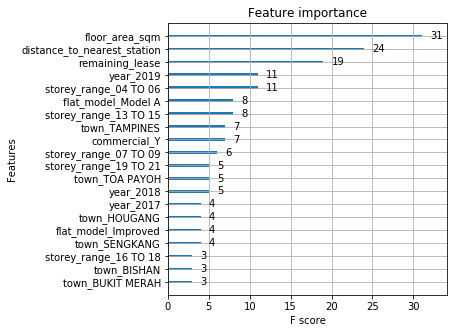

In [125]:
#running xgboost on y being psf

data_dmatrix2 = xgb.DMatrix(data=xp,label=yp)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(xp, yp, test_size=0.2, random_state=0)
print(Xp_train.shape)
print(Xp_test.shape)
print(yp_train.shape)
print(yp_test.shape)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(Xp_train,yp_train)
predsp = xg_reg.predict(Xp_test)
rmse = np.sqrt(mean_squared_error(yp_test, predsp))
print("RMSE: %f" % (rmse))
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix2, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

xg_reg = xgb.train(params=params, dtrain=data_dmatrix2, num_boost_round=10)

import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg, max_num_features =20)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()